In [2]:
# import main libraries and preview of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('Historical Product Demand.csv') 
df=pd.DataFrame(data)
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


<b>Obtaining information about the structure and characteristics of the df DataFrame (Historical Product Demand)</b>

In [3]:
df.shape

(1048575, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


<i>Null values detected in Date column. To remove.<br>
Data Types for Date and Order_Demand stated as "object". To change to DateTime and Int64 accordingly.</i>

In [5]:
# updating datatypes
df['Date'] = pd.to_datetime(df['Date'])
# adding new column to see which values were converted to NaN if any
df['Order_Demand_Updated'] = pd.to_numeric(df['Order_Demand'],errors='coerce',downcast='integer')

In [6]:
df.info() # re-checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Product_Code          1048575 non-null  object        
 1   Warehouse             1048575 non-null  object        
 2   Product_Category      1048575 non-null  object        
 3   Date                  1037336 non-null  datetime64[ns]
 4   Order_Demand          1048575 non-null  object        
 5   Order_Demand_Updated  1038106 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 48.0+ MB


In [7]:
data_nan = df[df['Order_Demand_Updated'].isna()]
data_nan.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Order_Demand_Updated
112290,Product_2169,Whse_A,Category_024,2012-08-09,(1),NaN
112307,Product_2132,Whse_A,Category_009,2012-11-01,(24),NaN
112308,Product_2144,Whse_A,Category_009,2012-11-01,(24),NaN
112356,Product_2118,Whse_A,Category_009,2012-03-07,(50),NaN
112357,Product_2120,Whse_A,Category_009,2012-03-07,(100),NaN


<u>Note:</u> Negative values are enclosed within brackets, rather than using a minus sign. This caused issues during the conversion from object to numeric data type, and it requires correction.

In [8]:
# Custom function to convert values with brackets to integers
def convert_to_integer(value):
    try:
        return int(value)
    except ValueError:
        # Handle values with brackets for negative numbers
        try:
            return -int(value.strip('()'))
        except ValueError:
            return None  # Handle other non-convertible values as needed

In [9]:
# adding another column to compare with primary data
df['Order_Demand_Updated2'] = df['Order_Demand'].apply(convert_to_integer)


In [10]:
df.describe(include='all')

C:\Users\gareg\AppData\Local\Temp\ipykernel_5620\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Order_Demand_Updated,Order_Demand_Updated2
count,1048575,1048575,1048575,1037336,1048575,1.038106e+06,1.048575e+06
unique,2160,4,33,1729,3828,NaN,NaN
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,1000,NaN,NaN
freq,16936,764447,481099,2075,112682,NaN,NaN
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.936488e+03,4.867427e+03
std,NaN,NaN,NaN,NaN,NaN,2.902462e+04,2.893346e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-9.990000e+05
25%,NaN,NaN,NaN,NaN,NaN,2.000000e+01,1.800000e+01



<i><b>Summary:</b> <br>The dataset consist of approximately 5 years historical data and contains 2,160 unique products distributed across 4 warehouses and belonging to 33 product categories.<br> The 'min' value in 'Order_Demand' columns indicates negative demand, likely corresponding to product return operations. It is necessary to remove both negative and corresponding positive demand entries to get real demand pattern.</i>

In [11]:
# check what NaN is for Date column
data_nan_date=df[df['Date'].isna()]
data_nan_date.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Order_Demand_Updated,Order_Demand_Updated2
45460,Product_1461,Whse_A,Category_019,NaT,10000,10000.0,10000
456373,Product_1636,Whse_A,Category_019,NaT,100,100.0,100
456374,Product_1461,Whse_A,Category_019,NaT,300,300.0,300
456375,Product_1464,Whse_A,Category_019,NaT,300,300.0,300
456376,Product_1388,Whse_A,Category_019,NaT,200,200.0,200


In [12]:
# remove rows with NaN dates
df.dropna(subset=['Date'], inplace=True)

# remove Order_Demand_Updated and Order_Demand_Updated2 as they were added to see the difference and result of our updates
df.drop(['Order_Demand_Updated','Order_Demand_Updated2'],axis=1,inplace=True)



In [13]:
# converting Order_Demand to integer
df['Order_Demand'] = df['Order_Demand'].apply(convert_to_integer)

In [14]:
# remove rows with 0 order demand
df = df[df['Order_Demand'] != 0]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008664 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1008664 non-null  object        
 1   Warehouse         1008664 non-null  object        
 2   Product_Category  1008664 non-null  object        
 3   Date              1008664 non-null  datetime64[ns]
 4   Order_Demand      1008664 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.2+ MB


In [16]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [17]:
# creating series (series_negative) with extracted indices with negative values
df_sorted=df['Order_Demand'].sort_values()
df_sorted.head()
negative_value_count = df[df['Order_Demand'] < 0]['Order_Demand'].count()
print("Negative Value Count:", negative_value_count)
series_negative=df_sorted[0:negative_value_count]
print(series_negative.tail())

Negative Value Count: 5899
990924   -1
603818   -1
187255   -1
768838   -1
398251   -1
Name: Order_Demand, dtype: int64


In [18]:
# Dropping rows with negative values in Order_Demand which don't have positive pairs (can't explain their existance)
series_negative_pairs=[]
number_of_single_negatives=0
for index_negative, value_negative in series_negative.items():
    # Check if the absolute of negative value exists in the 'Order_Demand' column
    value_exists = (df['Order_Demand'] == abs(value_negative)).any()
    if not value_exists:
        df.drop(index=index_negative, inplace=True)
        number_of_single_negatives+=1
    else :
        series_negative_pairs.append(( index_negative,value_negative))
        
print(f"{number_of_single_negatives} rows with negative Order_Demand value were dropped as they didn't have any positive pair")


26 rows with negative Order_Demand value were dropped as they didn't have any positive pair


In [19]:
# preparing to remove negative and possitive pair. "For loop" can't be used as it's very time consuming for this quantites.

# convert all negative values in Order_Demand to positive ones (info about them beeing them negative is stored in series_negative_pairs)

df['Order_Demand'] = df['Order_Demand'].abs()

# Sort by 'Order_Demand' and then by 'Date'
df.sort_values(by=['Order_Demand', 'Date'], inplace=True)

In [20]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44795,Product_0965,Whse_A,Category_006,2011-11-18,1
93055,Product_0504,Whse_J,Category_015,2011-12-05,1
130643,Product_2165,Whse_C,Category_024,2011-12-06,1
37485,Product_1699,Whse_J,Category_026,2011-12-07,1
77277,Product_1680,Whse_S,Category_021,2011-12-09,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008638 entries, 44795 to 20892
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1008638 non-null  object        
 1   Warehouse         1008638 non-null  object        
 2   Product_Category  1008638 non-null  object        
 3   Date              1008638 non-null  datetime64[ns]
 4   Order_Demand      1008638 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.2+ MB


In [22]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44795,Product_0965,Whse_A,Category_006,2011-11-18,1
93055,Product_0504,Whse_J,Category_015,2011-12-05,1
130643,Product_2165,Whse_C,Category_024,2011-12-06,1
37485,Product_1699,Whse_J,Category_026,2011-12-07,1
77277,Product_1680,Whse_S,Category_021,2011-12-09,1


In [23]:
# insert new column (New_ID) for incremental numbers will need in order to remove negative-positive pairs. 
df.insert(0,"New_ID",range(0,len(df)))

In [24]:
df

,New_ID,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44795,0,Product_0965,Whse_A,Category_006,2011-11-18,1
93055,1,Product_0504,Whse_J,Category_015,2011-12-05,1
130643,2,Product_2165,Whse_C,Category_024,2011-12-06,1
37485,3,Product_1699,Whse_J,Category_026,2011-12-07,1
77277,4,Product_1680,Whse_S,Category_021,2011-12-09,1
...,...,...,...,...,...,...
258396,1008633,Product_1248,Whse_J,Category_019,2013-11-11,2560000
72638,1008634,Product_1341,Whse_C,Category_019,2012-02-06,3000000
20477,1008635,Product_1248,Whse_J,Category_019,2012-07-05,3000000
222266,1008636,Product_1432,Whse_S,Category_019,2013-06-14,3000000


In [25]:
# Create an empty list to store New_IDs corresponding to negative values and their possitive pairs as they will be in "New_ID-1" row
new_ids_for_negatives = []

# Iterate through series_negative_pairs
for index_negative, _ in series_negative_pairs:
    # Find the corresponding New_ID using loc
    new_id = df.loc[df.index == index_negative, 'New_ID'].values[0]
    new_ids_for_negatives.append(new_id)
    new_ids_for_negatives.append(new_id-1)

print(f"Total rows to be removed is {len(new_ids_for_negatives)}")

Total rows to be removed is 11746


In [26]:
# now removing rows where New_IDs are in new_ids_for_negatives

# Create a boolean mask to filter rows based on New_ID
mask = df['New_ID'].isin(new_ids_for_negatives)

# Use the mask to filter the DataFrame and keep rows where New_ID is not in the list
df = df[~mask]


In [27]:
# now we can drop New_ID column as it was created to remove negative-positive pairs
df=df.drop('New_ID',axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997700 entries, 44795 to 20892
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product_Code      997700 non-null  object        
 1   Warehouse         997700 non-null  object        
 2   Product_Category  997700 non-null  object        
 3   Date              997700 non-null  datetime64[ns]
 4   Order_Demand      997700 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 45.7+ MB


In [29]:
df.shape

(997700, 5)

In [30]:
# Saving cleanned dataframe to a new CSV file
df.to_csv('Historical_Product_Demand_Cleaned.csv',index=False)

In [31]:
df.describe()

,Order_Demand
count,9.977000e+05
mean,5.119342e+03
std,2.956990e+04
min,1.000000e+00
25%,2.500000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


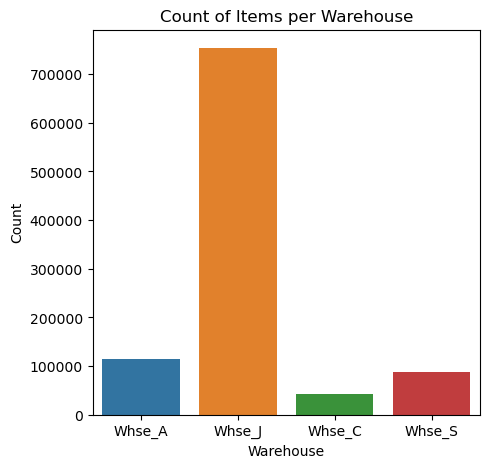

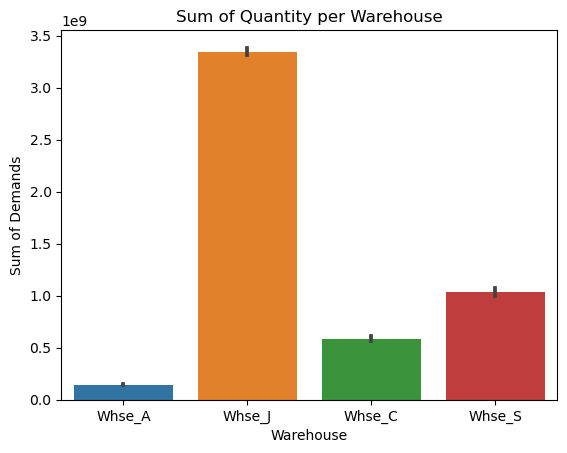

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
# Create a count plot to show the number of entries per warehouse
sns.countplot(x='Warehouse', data=df)
plt.title('Count of Orders per Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Count')
plt.show()

# Create a bar plot to show the sum of a order demands per warehouse
sns.barplot(x='Warehouse', y='Order_Demand', data=df, estimator=sum)
plt.title('Sum of Orders per Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Sum of Demands')
plt.show()


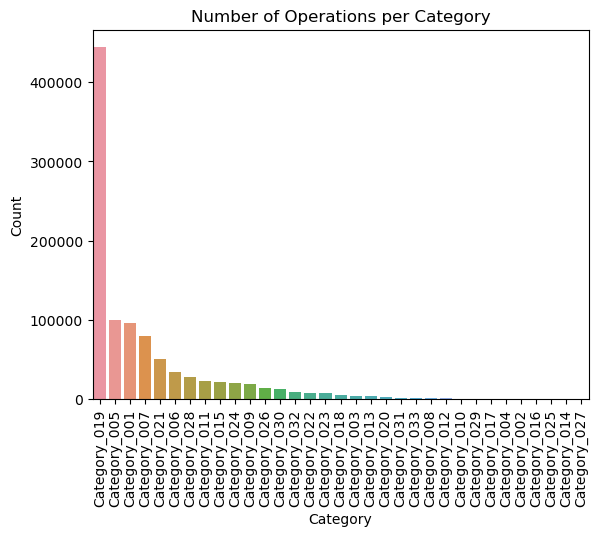

In [32]:
# Plot Number of operations per Category
category_counts = df['Product_Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Operations per Category')
plt.xticks(rotation=90)  # Rotate the category labels for better visibility
plt.show()

In [32]:
# Check number of unique products
print(f"Number of unique products is: {df['Product_Code'].nunique()}")

Number of unique products is: 2160


<b> Want to choose/slice the 5 most popular items (most often demanded) in the busiest warehouse to make forecast </b>

In [33]:
# check busiest warehouse

# total transactions per dataset
total_transaction_counts=df['Order_Demand'].count()

# number total transactions per warehouse
warehouse_transaction_counts=df.groupby('Warehouse')['Order_Demand'].count().reset_index()
wh=pd.DataFrame(warehouse_transaction_counts).sort_values('Order_Demand',ascending=False)

# percentage of total transactions per warehouse
wh['Transactions %']=(wh['Order_Demand']/total_transaction_counts)*100

busiest_warehouse = wh.iloc[0]
print(f"The busiest warehouse is {busiest_warehouse['Warehouse']} with {busiest_warehouse['Order_Demand']} transactions which is {round(busiest_warehouse['Transactions %'])}% of all transactions ({total_transaction_counts}).")

The busiest warehouse is Whse_J with 753593 transactions which is 76% of all transactions (997700).


In [34]:
wh

,Warehouse,Order_Demand,Transactions %
2,Whse_J,753593,75.533026
0,Whse_A,114819,11.508369
3,Whse_S,87244,8.744512
1,Whse_C,42044,4.214092


In [36]:
# Count number of transactions per product in the busiest warehouse and extract top 5
product_transaction_counts_Whse_J = df[df['Warehouse']=='Whse_J'].groupby('Product_Code')['Order_Demand'].count().reset_index()
product_transaction_counts_Whse_J=product_transaction_counts_Whse_J.sort_values(by=['Order_Demand'],ascending=False)
product_top5_transaction_counts_Whse_J=product_transaction_counts_Whse_J.head()
product_top5_transaction_counts_Whse_J

,Product_Code,Order_Demand
1006,Product_1359,16834
949,Product_1295,10434
1024,Product_1378,9643
942,Product_1286,8779
1028,Product_1382,8509


In [37]:
# collecting 5 top products data in "product_data" list by iterating through top5 products list
product_data = []

for index, row in product_top5_transaction_counts_Whse_J.iterrows():
    product = row['Product_Code']
    filtered_data = df[(df['Product_Code'] == product) & (df['Warehouse'] == "Whse_J")][['Date', 'Order_Demand']].sort_values(by='Date')
    grouped_data = filtered_data.groupby('Date').sum().reset_index()
    grouped_data.rename(columns={'Order_Demand': product}, inplace=True)  # Rename 'Order_Demand' to the product code
    grouped_data.set_index('Date',inplace=True)
    product_data.append(grouped_data)

In [38]:
# experimenting with the first group of data in the list (product_1359)
df_experiment=pd.DataFrame(product_data[0]).reset_index()
df_experiment.set_index('Date', inplace=True)

In [39]:
df_experiment.head()

,Product_1359
Date,
2012-01-05,702000
2012-01-06,676000
2012-01-10,783000
2012-01-11,200000
2012-01-12,284000


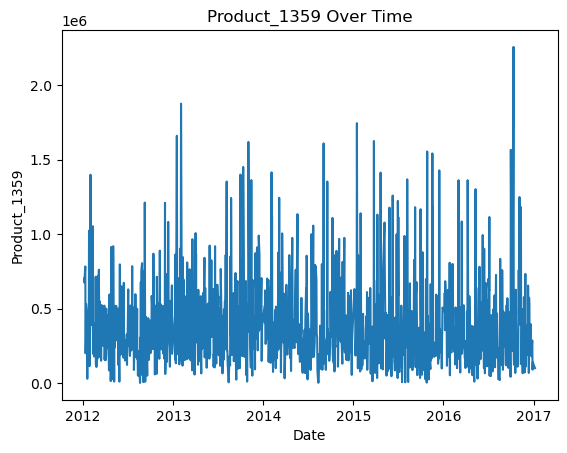

In [40]:
sns.lineplot(data=df_experiment, x=df_experiment.index, y=df_experiment['Product_1359'])

plt.xlabel('Date')
plt.ylabel('Order Demand for Product_1359')
plt.title('Product_1359 Over Time')
plt.show()

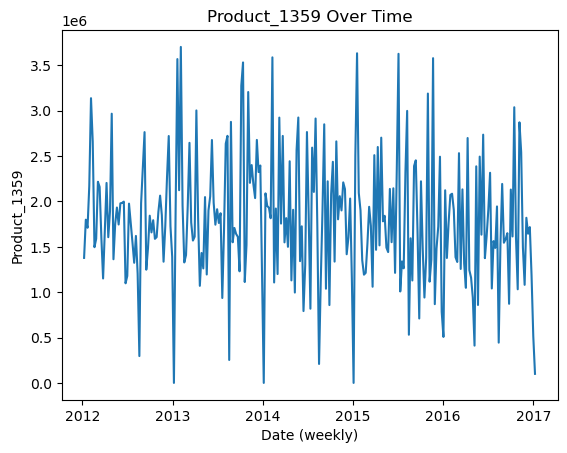

In [41]:
# let's try with weekly data

# Resample to weekly frequency and sum the values for each week
df_experiment_weekly = df_experiment.resample('W').sum()
sns.lineplot(data=df_experiment_weekly, x=df_experiment_weekly.index, y=df_experiment_weekly['Product_1359'])

plt.xlabel('Date (weekly)')
plt.ylabel('Order Demand for Product_1359')
plt.title('Product_1359 Over Time')
plt.show()

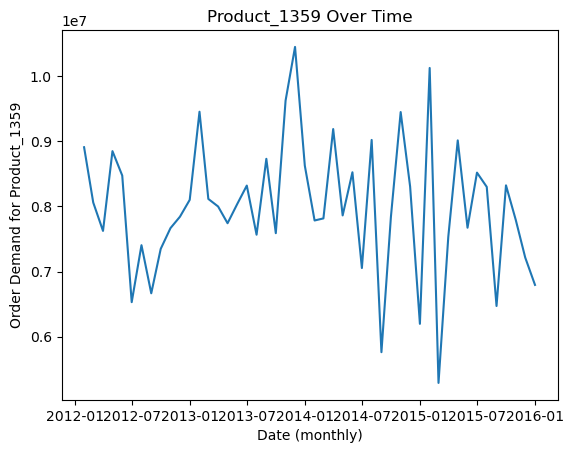

In [61]:
# let's try with monthly data

# Resample to monthly frequency and sum the values for each month
df_experiment_monthly = df_experiment.resample('M').sum()
df_experiment_monthly = df_experiment_monthly[(df_experiment_monthly.index > '2011-01-31') & (df_experiment_monthly.index < '2016-01-31')]

sns.lineplot(data=df_experiment_monthly, x=df_experiment_monthly.index, y=df_experiment_monthly['Product_1359'])

plt.xlabel('Date (monthly)')
plt.ylabel('Order Demand for Product_1359')
plt.title('Product_1359 Over Time')
plt.show()

In [87]:
# creating function for checking stationarity using Augmented Dickey-Fuller (ADF) test (Null Hypothesis: it is non-stationary)
def test_stationarity(dataFrame,var):
    dataFrame['rollMean']=dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']=dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest=adfuller(dataFrame[var], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index = ["Test Statistic","p-value","#lags used","number of observations used"])
    print(stats)
    
    for key,values in adfTest[4].items():
        print("criticality",key,":",values)
    

    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

    if (adfTest[4]['1%'])>adfTest[0]: # if "critical values" > "Test Statistics" then stationary
        print ("************Data is stationary************")
    else:
        print ("************Data is NOT stationary************")

Test Statistic                -7.632000e+00
p-value                        1.997440e-11
#lags used                     0.000000e+00
number of observations used    4.700000e+01
dtype: float64
criticality 1% : -3.5778480370438146
criticality 5% : -2.925338105429433
criticality 10% : -2.6007735310095064
************Data is stationary************


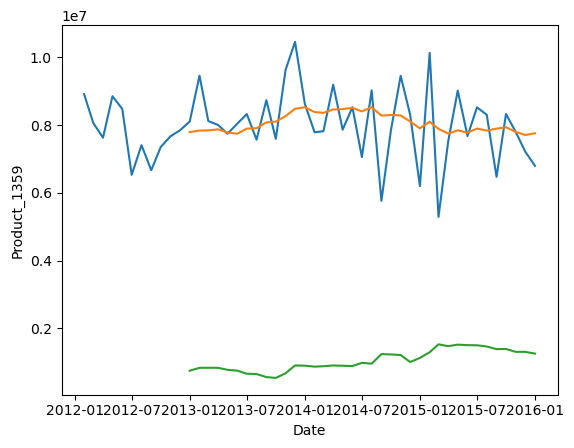

In [171]:
# test for stationarity for data with MONTHLY intervals
test_stationarity(df_experiment_monthly,"Product_1359")

Test Statistic                -1.111701e+01
p-value                        3.542385e-20
#lags used                     2.000000e+00
number of observations used    2.590000e+02
dtype: float64
criticality 1% : -3.4558530692911504
criticality 5% : -2.872764881778665
criticality 10% : -2.572751643088207
************Data is stationary************


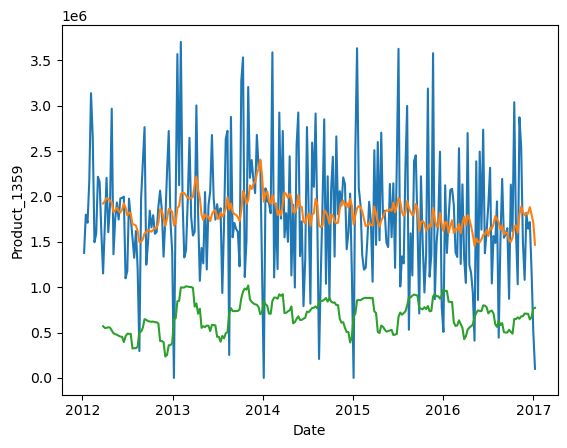

In [172]:
# test for stationarity for data with WEEKLY intervals
test_stationarity(df_experiment_weekly,"Product_1359")

Test Statistic                  -34.648337
p-value                           0.000000
#lags used                        0.000000
number of observations used    1228.000000
dtype: float64
criticality 1% : -3.4356863371792095
criticality 5% : -2.8638964938393667
criticality 10% : -2.568024631481501
************Data is stationary************


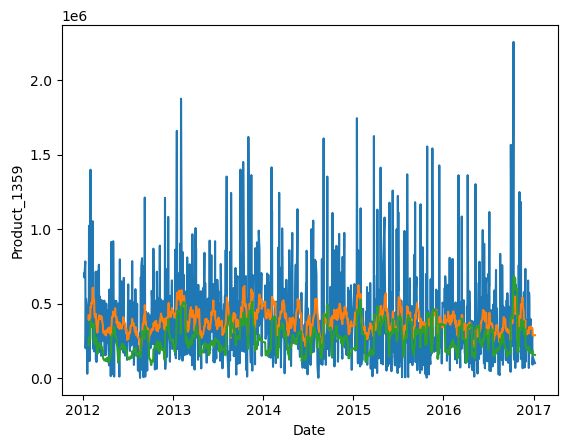

In [173]:
# test for stationarity for data with DAILY intervals
test_stationarity(df_experiment,"Product_1359")

<b> ARIMA </b>

In [104]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

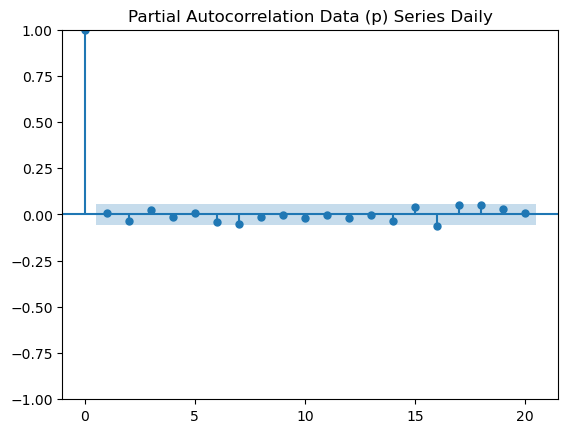

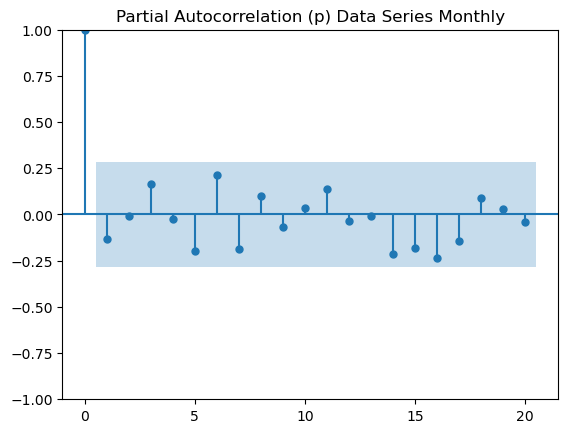

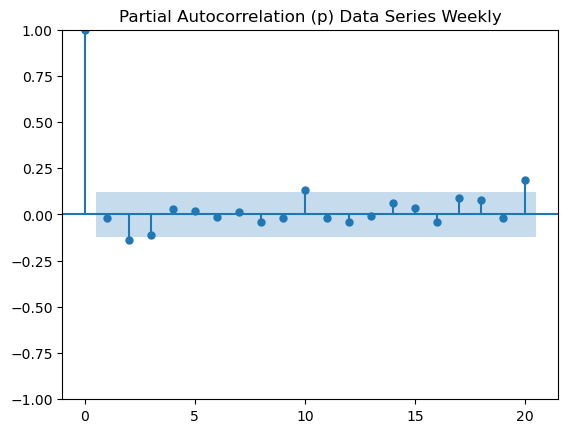

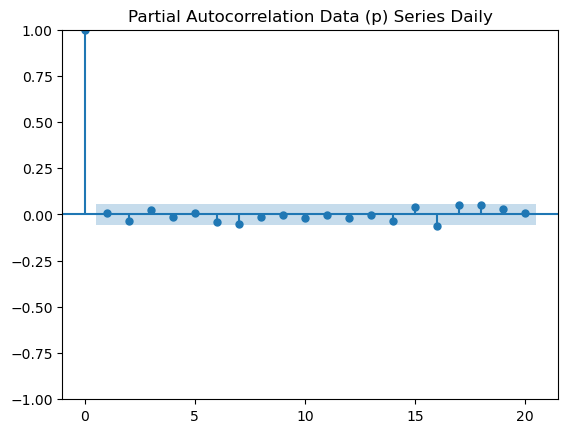

In [177]:
plot_pacf(df_experiment_monthly['Product_1359'],lags=20, title='Partial Autocorrelation (p) Data Series Monthly') # visually want to detect value for p (monthly intervals)
plot_pacf(df_experiment_weekly['Product_1359'],lags=20,title='Partial Autocorrelation (p) Data Series Weekly') # visually want to detect value for p (weekly intervals)
plot_pacf(df_experiment['Product_1359'],lags=20,title='Partial Autocorrelation Data (p) Series Daily') # visually want to detect value for p (daily intervals)

In [95]:
# p value is 1

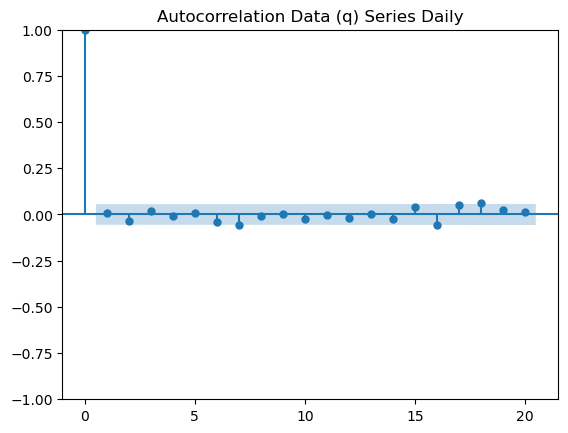

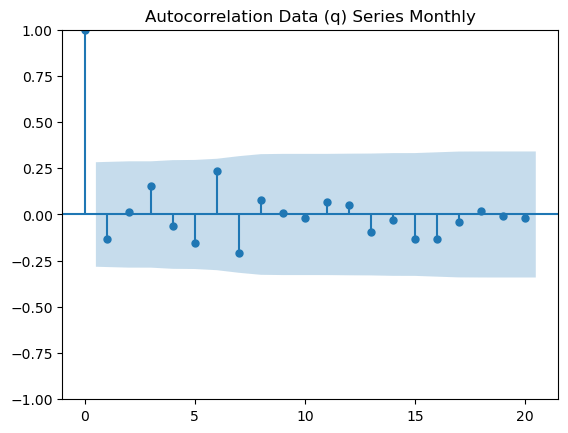

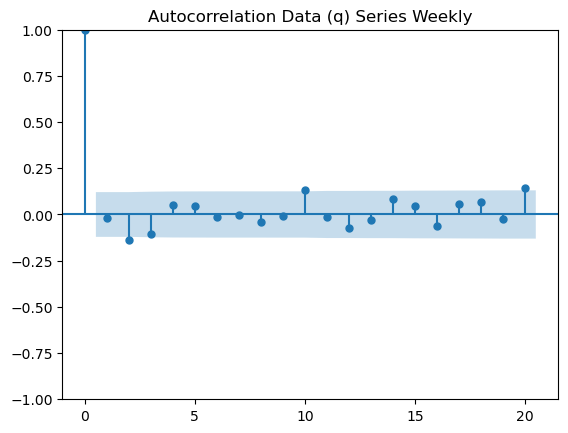

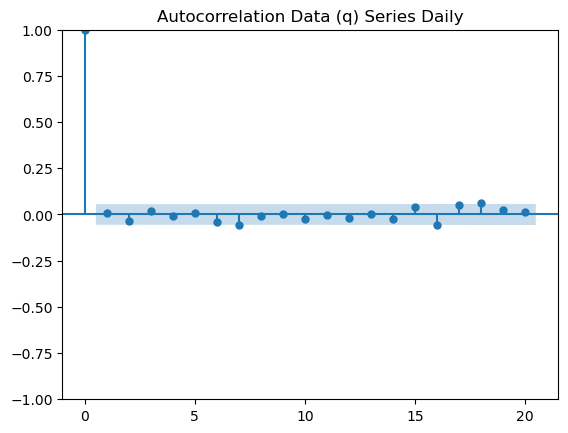

In [180]:
plot_acf(df_experiment_monthly['Product_1359'],lags=20,title='Autocorrelation Data (q) Series Monthly') # visually want to detect value for q (monthly intervals)
plot_acf(df_experiment_weekly['Product_1359'],lags=20,title='Autocorrelation Data (q) Series Weekly') # visually want to detect value for q (weekly intervals) 
plot_acf(df_experiment['Product_1359'],lags=20,title='Autocorrelation Data (q) Series Daily') # visually want to detect value for q (daily intervals) 

In [97]:
# q value is 1
# p=1, d=1, q=1

In [114]:
# spliting data to train and test
train=df_experiment_monthly[:round(len(df_experiment_monthly)*0.8)]
test=df_experiment_monthly[round(len(df_experiment_monthly)*0.8):]

In [115]:
test.head()

,Product_1359,rollMean,rollStd
Date,,,
2015-03-31,7533000,7.747500e+06,1.477740e+06
2015-04-30,9015000,7.843500e+06,1.522662e+06
2015-05-31,7674000,7.772583e+06,1.507781e+06
2015-06-30,8520000,7.894667e+06,1.503701e+06
2015-07-31,8301000,7.834583e+06,1.468555e+06


In [165]:
#  creating model object
model = ARIMA(train['Product_1359'],order=(1,1,1))

# fit the model
model_fit = model.fit()

# making prediction on test data
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])

<Axes: xlabel='Date', ylabel='Product_1359'>

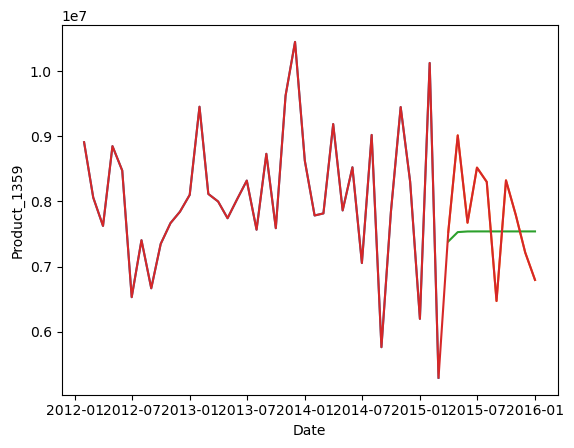

In [166]:
# adding prediction column (arimaPred) to our dataset to compare plots with actual and predicted data
df_experiment_monthly['arimaPred'] = prediction

# plot train data
sns.lineplot(data=train, x=train.index, y='Product_1359') 

# plot test data
sns.lineplot(data=test,x=test.index,y='Product_1359')

# plot predicted data
sns.lineplot(data=df_experiment_monthly,x=df_experiment_monthly.index,y='arimaPred')

# plot df_experiment_monthly
sns.lineplot(data=df_experiment_monthly,x=df_experiment_monthly.index,y='Product_1359')

In [167]:
# checking RMSE (Root Mean Squared Error): a measure of the model's prediction accuracy.
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(test['Product_1359'],prediction))

791444.0183770253

In [168]:
# checking a mean of Product_1359

print(df_experiment_monthly['Product_1359'].mean())


7992270.833333333


RMSE is close to the mean of 'Product_1359,' it indicates that ARIMA model's predictions are not significantly better than using the mean as a naive prediction.